In [1]:
# GHOST - Projection Test (2D)

import sys  
import numpy as np
import modepy as mp
sys.path.insert(0, '../src')
from Mesh import Mesh2D
from Discretization import SpatialDiscretization
from Solver import Solver


# discretization degree
p = 1

# geometry mapping degree (isoparametric)
p_geo = p

# read in mesh in GMSH format
mesh = Mesh2D("test", "../mesh/square_mesh_x_5y_5.msh")

#curvilinear transformation used in Del Rey Fernandez et al. (2017)
mesh.map_mesh(f_map=Mesh2D.grid_transformation(), p_geo=p_geo)

# volume and facet quadrature degrees
tau = 2*p + 1
mu = 2*p + 1

# solver parameters
params = {"project_title": "projection_test_2d",
         "problem": "projection",
         "initial_condition": "sine",
         "wavelength": np.array([1.0,1.0]),
         "integration_type": "quadrature",
         "solution_degree": p,
         "volume_quadrature_degree": tau,
         "facet_quadrature_degree": mu}

# set up solver
projection_solver = Solver(params,mesh)

In [2]:
# run solver
projection_solver.run()
projection_solver.post_process(solution_resolution=30)

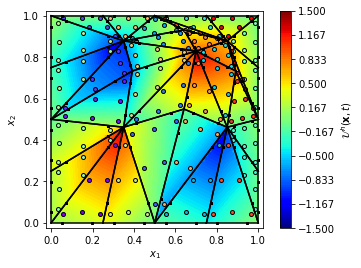

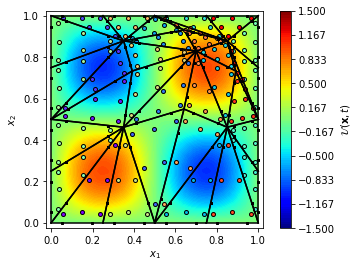

In [3]:
projection_solver.plot(plot_numerical=True, plot_exact=True, plot_curves=True, plot_nodes=True, geometry_resolution=10, 
                       u_range=[-1.5,1.5])

In [4]:
projection_solver.discretization.N_gamma

[[2, 2, 2]]